## Exercise 6.4 Supervised Machine Learning: Regression

### This script contains the following:
#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data preparation for regression analysis
#### 4. Regression analysis¶

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path=r"C:\Users\acisk\Dropbox\My PC (DESKTOP-SO8P63N)\Desktop\Data Analytics\Achievement 6 Project- Advanced Analytics & Dashboard Design"

In [4]:
#Importing players data
fifa_21= pd.read_csv(os.path.join(path, 'FIFA 21 Ratings Project','Data', 'Prepared Data', 'FIFA21_ratings.csv'), index_col = False)

In [5]:
fifa_21.head()

,Unnamed: 0,sofifa_id,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,player_rating,...,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,team_jersey_number,contract_valid_until
0,0,158023,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,...,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,CAM,10.0,2021.0
1,1,20801,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,...,220000,"ST, LW",Right,5,4,5,High/Low,LS,7.0,2022.0
2,2,200389,27,188,87,Slovenia,Atl��tico Ma,Spain Primera Division,1.0,91,...,125000,GK,Right,3,3,1,Medium/Medium,GK,13.0,2023.0
3,3,188545,31,184,80,Poland,FC Bayern M��n,German 1. Bundesliga,1.0,91,...,240000,ST,Right,4,4,4,High/Medium,ST,9.0,2023.0
4,4,190871,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,...,270000,"LW, CAM",Right,5,5,5,High/Medium,LW,10.0,2022.0


### 2. Data Cleaning

In [6]:
#Dropping the unnammed column
fifa_21.drop(columns=['Unnamed: 0'], inplace= True) 

In [7]:
fifa_21.head()

,sofifa_id,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,player_rating,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,team_jersey_number,contract_valid_until
0,158023,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,CAM,10.0,2021.0
1,20801,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,LS,7.0,2022.0
2,200389,27,188,87,Slovenia,Atl��tico Ma,Spain Primera Division,1.0,91,75000000,125000,GK,Right,3,3,1,Medium/Medium,GK,13.0,2023.0
3,188545,31,184,80,Poland,FC Bayern M��n,German 1. Bundesliga,1.0,91,80000000,240000,ST,Right,4,4,4,High/Medium,ST,9.0,2023.0
4,190871,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,LW,10.0,2022.0


In [8]:
fifa_21.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'nationality',
       'club_name', 'league_name', 'league_rank', 'player_rating', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'team_position', 'team_jersey_number', 'contract_valid_until'],
      dtype='object')

In [9]:
# Dropping the unneeded columns
fifa_21_new= fifa_21[['sofifa_id', 'age', 'height_cm', 'weight_kg', 'player_rating', 'value_eur',
       'wage_eur',]]

In [10]:
fifa_21_new.shape

(18719, 7)

In [16]:
# Renaming the columns 

fifa_21_new.rename(columns = {'sofifa_id' : 'Player ID', 'age' : 'Age', 'value_eur': 'Market Value EUR',
       'wage_eur' : 'Wages EUR'}, inplace = True)

In [17]:
fifa_21_new

,Player ID,Age,height_cm,weight_kg,player_rating,Market Value EUR,Wages EUR
0,158023,33,170,72,93,67500000,560000
1,20801,35,187,83,92,46000000,220000
2,200389,27,188,87,91,75000000,125000
3,188545,31,184,80,91,80000000,240000
4,190871,28,175,68,91,90000000,270000
...,...,...,...,...,...,...,...
18714,256679,24,176,73,47,40000,500
18715,257710,21,177,70,47,35000,1000
18716,250989,20,185,74,47,35000,1000
18717,257697,23,186,80,47,40000,1000


#### Missing values

In [18]:
# Check for missing values

fifa_21_new.isnull().sum()
# No missing values to handle

Player ID           0
Age                 0
height_cm           0
weight_kg           0
player_rating       0
Market Value EUR    0
Wages EUR           0
dtype: int64

#### Duplicates check

In [19]:
dups = fifa_21_new.duplicated()

In [20]:
# No duplicates
dups.shape

(18719,)

#### Extreme values check

C:\Users\acisk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='player_rating', ylabel='Density'>

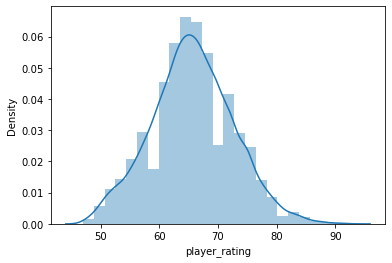

In [27]:
sns.distplot(fifa_21_new['player_rating'], bins=25) # Shows extreme values

In [37]:
#Descriptive statistics
fifa_21_new['player_rating'].describe()

count    18719.000000
mean        65.635023
std          7.003908
min         47.000000
25%         61.000000
50%         66.000000
75%         70.000000
max         93.000000
Name: player_rating, dtype: float64

### 3. Data preparation for regression analysis

#### Hypothesis: If there is increase in player wages then, there will be increase in their ratings

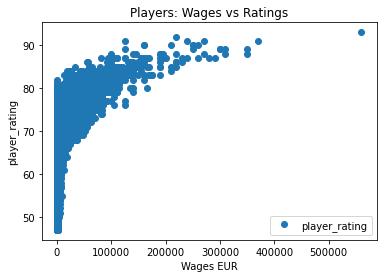

In [45]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

fifa_21_new.plot(x = 'Wages EUR', y='player_rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Players: Wages vs Ratings')  
plt.xlabel('Wages EUR')  
plt.ylabel('player_rating')  
plt.show()

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = fifa_21_new['Wages EUR'].values.reshape(-1,1)
y = fifa_21_new['player_rating'].values.reshape(-1,1)

In [47]:
X

array([[560000],
       [220000],
       [125000],
       ...,
       [  1000],
       [  1000],
       [  2000]], dtype=int64)

In [48]:
y

array([[93],
       [92],
       [91],
       ...,
       [47],
       [47],
       [47]], dtype=int64)

In [49]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [50]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

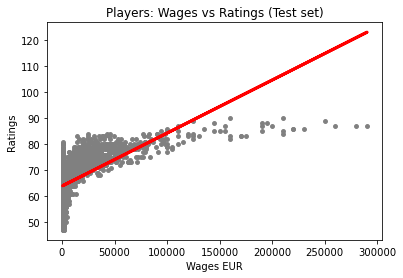

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Players: Wages vs Ratings (Test set)')
plot_test.xlabel('Wages EUR')
plot_test.ylabel('Ratings')
plot_test.show()

#### The trend line travels upwards diagonally from left to right, this shows a positive correlation between the variables, the data points are closer to the trend lines indicating a strong correlation, this confirms our hypothesis.

In [54]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00020409]]
Mean squared error:  31.543083910269832
R2 score:  0.34415969778143407


#### The slope is positive and it indicates if there is an increase in wages then there will increate in player ratings.
#### RMSE  is 31.5, this means the regression line is close to the data points.
#### The R2 score is 0.344, this means the model isn’t a good fit.

In [56]:
y_predicted

array([[68.15211832],
       [64.27442593],
       [63.96829232],
       ...,
       [68.96847461],
       [64.68260407],
       [64.27442593]])

In [58]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,76,68.152118
1,67,64.274426
2,66,63.968292
3,57,63.968292
4,67,63.968292
5,64,64.478515
6,58,64.478515
7,58,63.968292
8,63,64.274426
9,59,63.968292


#### The relationship simply doesn’t follow a single, straight regression line, so it won’t be able to accurately predict the player ratings